# Challenge House Pricing

## 1. Nạp dữ liệu

#### 1.1 Import thư viện

In [59]:
import pandas as pd
import itables 
from itables import show
from IPython import display

#### 1.2 Nạp và xem dữ liệu

In [60]:
df = pd.read_csv('data/train.csv')

In [61]:
show(df)

Loading ITables v2.5.2 from the internet... (need help?)


## 2. Phân tích khám phá dữ liệu

### 1. Thống kê mô tả (Descriptive Statistics) - Ungraphic Approach

#### 1.1 Quan sát dữ liệu

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

+ 1460 bộ, 43 kiểu object, 3 kiểu float và 35 kiểu số nguyên.
+ 81 thuộc tính.

#### 1.2 Kiểm tra null và số thuộc tính có giá trị 0 trong tập

In [63]:
n = 0
for name, sum in df.isna().sum().items():
    if sum > 0:
        print(f'{name}: {sum}')
        n += 1
print(f"\nTotal features: {n}")

LotFrontage: 259
Alley: 1369
MasVnrType: 872
MasVnrArea: 8
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
BsmtFinType2: 38
Electrical: 1
FireplaceQu: 690
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageQual: 81
GarageCond: 81
PoolQC: 1453
Fence: 1179
MiscFeature: 1406

Total features: 19


+ Thiếu electrical

In [64]:
n = 0
for name, sum in (df == 0).sum().items():
    if sum > 0:
        print(f'{name}: {sum}')
        n += 1
print(f"\nTotal features: {n}")

MasVnrArea: 861
BsmtFinSF1: 467
BsmtFinSF2: 1293
BsmtUnfSF: 118
TotalBsmtSF: 37
2ndFlrSF: 829
LowQualFinSF: 1434
BsmtFullBath: 856
BsmtHalfBath: 1378
FullBath: 9
HalfBath: 913
BedroomAbvGr: 6
KitchenAbvGr: 1
Fireplaces: 690
GarageCars: 81
GarageArea: 81
WoodDeckSF: 761
OpenPorchSF: 656
EnclosedPorch: 1252
3SsnPorch: 1436
ScreenPorch: 1344
PoolArea: 1453
MiscVal: 1408

Total features: 23


+ **Đáng chú ý:**
    + LotFrontage vs alley
    + BsmtExposure có 38 giá trị null trong khi các giá trị liên quan như BsmtCon, BsmtQual chỉ có 37. Có thể thiếu
+ **Thiếu**
    + Masonry veneer 872 type NaN nhưng có Masonry veneer Area 861 nhà có diện tích lót tường là 0. => Có thể thiếu dữ liệu.
    + Miscellaneous có 1406 căn không có nhưng lại 1408 căn không tiêu tiền cho Miscellaneous. 
    

#### 1.3 Thông số dữ liệu

In [65]:
display.display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### 2. Deep inspecting - Quan sát sâu

#### 2.1 Basement

In [66]:
temp = df[df['BsmtUnfSF'] == 0]
temp = temp[temp['BsmtFinType2'] == 'Unf']
show(temp[['BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtQual','BsmtCond','BsmtExposure','BsmtUnfSF','TotalBsmtSF',
           'GarageType','FireplaceQu','BsmtHalfBath','BsmtFullBath']])

Loading ITables v2.5.2 from the internet... (need help?)


+ **Thiếu**
    + Kiểu của basement type 2 có thể bị sai khi mà tổng diện tích hầm = diện tích đã hoàn thành + diện tích chưa hoàn thành. Nhưng diện tích type 2 chưa hoàn thành là 0 và loại hầm lại là 'Unf' nhưng tổng diện tích chưa xây lại là 0. có thể dữ liệu đây bị sai hay không đầy đủ.

In [67]:
temp = df[df['TotalBsmtSF'] != 0]
temp = temp[temp['BsmtExposure'].isna()]
show(temp[['BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtQual','BsmtCond','BsmtExposure','BsmtUnfSF','TotalBsmtSF',
           'GarageType','FireplaceQu','BsmtHalfBath','BsmtFullBath']])

Loading ITables v2.5.2 from the internet... (need help?)


+ **Chú ý** Hầm chưa hoàn thiện cả type 1 nhưng lại có chất lượng và tình trạng của tầng hầm ?

In [68]:
temp = df[df['BsmtFinType2'].isna() & df['BsmtUnfSF'] != 0]
show(temp[['BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtQual','BsmtCond','BsmtExposure','BsmtUnfSF','TotalBsmtSF',
           'GarageType','FireplaceQu','BsmtHalfBath','BsmtFullBath']])

Loading ITables v2.5.2 from the internet... (need help?)


In [69]:
temp = df[df['BsmtFinType2'].isna() & df['BsmtUnfSF'] == 0]
print(temp[['BsmtFinType2','BsmtFinType1']].isna().sum())

BsmtFinType2    37
BsmtFinType1    37
dtype: int64


+ Type2 thiếu dữ liệu.

#### 2.2 Masonry veneer 
+ Hay có thể gọi là lớp vật liệu bao quanh, lớp ngoài của cấu trúc chịu tải chính của căn nhà như khối xi măng hay khung thép, nó không có chứng năng chịu tải thường nhẹ và dùng để bảo vệ lớp chịu tải khỏi ảnh hưởng thiên nhiên và có khoảng trống giữa nó và cấu trúc chính. (Nhà bình thường chúng ta ở VN không xử dụng phương pháp veneer này, tường gạch là cấu trúc chịu tải chính)

In [70]:
temp = df[df['MasVnrArea'] > 0]
temp = temp[temp['MasVnrType'].isna()]
show(temp[['MasVnrType','MasVnrArea']])

Loading ITables v2.5.2 from the internet... (need help?)


+ Thiếu dữ liệu lót tường.

In [71]:
temp = df[df['MasVnrArea'] == 0]
temp = temp[temp['MasVnrType'].notnull()]
show(temp[['MasVnrType','MasVnrArea']])

Loading ITables v2.5.2 from the internet... (need help?)


+ Thiếu diện tích lót tường.

In [72]:
temp = df[df['MasVnrArea'].isna()]
show(temp[['MasVnrType','MasVnrArea']])

Loading ITables v2.5.2 from the internet... (need help?)


+ Diện tích lót là null thay vì 0. Có thể thiếu hoặc sai.

#### 2.3 Miscellaneous (một số yếu tố khác)

In [73]:
temp = df[df['MiscFeature'].isna()]
temp = temp[temp['MiscVal'] != 0]
show(temp[['MiscVal','MiscFeature']])

Loading ITables v2.5.2 from the internet... (need help?)


In [74]:
temp = df[df['MiscVal'] == 0]
temp = temp[temp['MiscFeature'].notnull()]
show(temp[['MiscVal','MiscFeature']])

Loading ITables v2.5.2 from the internet... (need help?)


+ Nghi rằng 2 dữ liệu trên thiếu giá trị.

#### 2.4 Street and Alley

In [75]:
temp = df[df['LotFrontage'].isna()]
temp = temp[temp['Alley'].isna()]
show(temp[['LotFrontage','Alley','Street','MSZoning','Neighborhood']])

Loading ITables v2.5.2 from the internet... (need help?)


#### 2.5 Kiểm tra FirePlace

In [76]:
df[(df['FireplaceQu'].isna()) & (df['Fireplaces'] == 0)].shape

(690, 81)

+ 690 bộ, không có bị lệch dữ liệu.

#### 2.6 Kiểm tra Pool

In [77]:
df[(df['PoolQC'].isna()) & (df['PoolArea'] == 0)].shape

(1453, 81)

+ 1453 bộ, không có bị lệch dữ liệu.

#### 2.7 Kiểm tra Garage

In [78]:
df[(df['GarageType'].isna()) &
   (df['GarageYrBlt'].isna()) &
   (df['GarageFinish'].isna()) &
   (df['GarageQual'].isna()) &
   (df['GarageCond'].isna())].shape

(81, 81)

+ 81 bộ, dữ liệu không bị lệch.

### 3. Data Cleaning - Dọn dẹp dữ liệu
+ Chuyển tất cá các giá trị Null gốc không có thành 'X' để dễ quản lí so với các dữ liệu còn lại và các dữ liệu không xác định thành 'U'.

#### 3.1 Basement

In [79]:
basement = ['BsmtQual', 'BsmtCond', 'BsmtExposure']
basement_val = ['Unf','X']
df.loc[(df['BsmtFinType2'] == 'Unf') & (df['TotalBsmtSF'] == df['BsmtFinSF1']),'BsmtFinType2'] = 'X'
df.loc[df['BsmtFinType2'].isna() & (df['BsmtUnfSF'] != 0),'BsmtFinType2'] = 'Unf'
# df.loc[df['BsmtFinType2'].isna() & (df['BsmtFinType1'].isna()),'BsmtFinType2'] = 'X'
# df.loc[(df['BsmtFinType2'] == 'X') & (df['BsmtFinType1'].isna()),'BsmtFinType1'] = 'X'

for col in basement:
    for val in basement_val:
        df.loc[(df['BsmtFinType2'] == val) & (df['BsmtFinType1'] == val) & (df[col].isna()),col] = 'X'
show(df[['BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtQual','BsmtCond','BsmtExposure','BsmtUnfSF','TotalBsmtSF',
           'GarageType','FireplaceQu','BsmtHalfBath','BsmtFullBath']])


Loading ITables v2.5.2 from the internet... (need help?)


In [80]:

for col in basement:
    for val in basement_val:
        df.loc[(df['BsmtFinType2'] == val) & (df['BsmtFinType1'] == val) & (df[col].isna()),col] = 'X'
show(df[['BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtQual','BsmtCond','BsmtExposure','BsmtUnfSF','TotalBsmtSF',
           'GarageType','FireplaceQu','BsmtHalfBath','BsmtFullBath']])

Loading ITables v2.5.2 from the internet... (need help?)


#### 3.2 Frontage & Alley

In [81]:
# df['Alley'] = df.groupby(['Neighborhood','MSZoning','Street'])['Alley'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x))
df['Alley'] = df['Alley'].fillna('U')
df['LotFrontage'] = df.groupby(['Neighborhood','MSZoning','Street'])['LotFrontage'].transform(lambda x: x.fillna(0))


In [82]:
show(df[['LotFrontage','Alley','Street','MSZoning','Neighborhood']])

Loading ITables v2.5.2 from the internet... (need help?)


#### 3.3 Masonry veneer

In [83]:
df.loc[(df['MasVnrArea'] > 0) & df['MasVnrType'].isna(),'MasVnrType'] = 'U'
df['MasVnrArea'].fillna(0, inplace=True)
df['MasVnrType'].fillna('X', inplace=True)

C:\Users\trand\AppData\Local\Temp\ipykernel_11940\3922211126.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MasVnrArea'].fillna(0, inplace=True)
C:\Users\trand\AppData\Local\Temp\ipykernel_11940\3922211126.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [84]:
show(df[['MasVnrType','MasVnrArea']])

Loading ITables v2.5.2 from the internet... (need help?)


#### 3.4 Electrical

In [85]:
df['Electrical'].fillna('U', inplace=True)

C:\Users\trand\AppData\Local\Temp\ipykernel_11940\2198525093.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electrical'].fillna('U', inplace=True)


#### 3.5 xét tất cả các thuộc tính mà dữ liệu là không có hay 'None' là không có về 'X' 

In [86]:
df['GarageYrBlt'].fillna(0, inplace=True)
df.fillna('X',inplace=True)

C:\Users\trand\AppData\Local\Temp\ipykernel_11940\2716838951.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageYrBlt'].fillna(0, inplace=True)


### 4. Hiển thị dữ liệu (Visualize Data) - Graphic Approach

#### 4.1 Phân bố của giá nhà

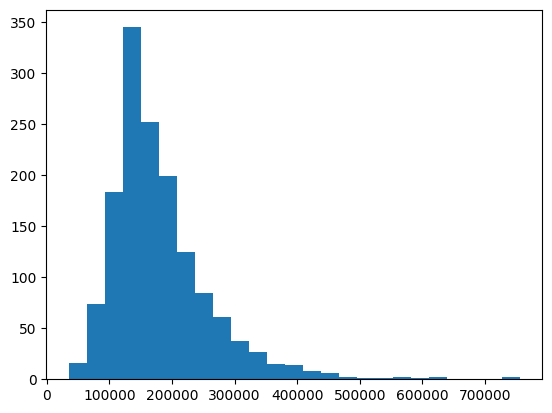

<Figure size 900x1000 with 0 Axes>

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.hist(x=df['SalePrice'],bins=25)
plt.figure(figsize=(9,10))
plt.show()